In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import numpy as np

sns.set(style="whitegrid", rc={"lines.linewidth": 4})
plt.rcParams.update({'axes.labelsize': 13.5})

In [2]:
def saveFigure(figure, name):
    fig = figure.get_figure()
    fig.savefig(f'../imagenes/curvaValidacion/{name}.png', dpi=200, bbox_inches='tight')

## Preparamos los datos para generar el csv

In [3]:
with open('../data/serialized/rrNNVALIDATIONCURVEDEF.sav', 'rb') as data_file:
    dataFile = pickle.load(data_file)

In [4]:
train, test = dataFile[0], dataFile[1]

In [5]:
depht = [1,2,3,4,5,7,10,13,15,18,-1]
min_samples_split = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
min_samples_leaf = [0.1, 0.2, 0.3, 0.4, 0.5]
distances = ['euclidean','manhattan', 'chebyshev', 'minkowski']
epocas = [10,20,50,100,150]
distancia = ['uniform', 'distance']

train_mean = np.mean(train, axis=1)
train_std = np.std(train, axis=1)

test_mean = np.mean(test, axis=1)
test_std = np.std(test, axis=1)

data = {"Epocas":epocas, "Train_Mean":train_mean, "Test_Mean":test_mean}

df = pd.DataFrame(data)

df

,Epocas,Train_Mean,Test_Mean
0,10,0.896642,0.896761
1,20,0.919169,0.918604
2,50,0.930739,0.930082
3,100,0.935549,0.934599
4,150,0.937246,0.936139


### Hacemos los gráficos

In [6]:
random_forest_profundidad_df = pd.read_csv('../data/resultados/curvaValidacion/randomForestPROFUNDIDAD.csv', sep=';')
random_forest_profundidad_df.head()

,Profundidad,Accuracy,Type
0,1,0.759141,TRAIN
1,1,0.759141,TEST
2,2,0.790590,TRAIN
3,2,0.790497,TEST
4,3,0.835976,TRAIN


No handles with labels found to put in legend.


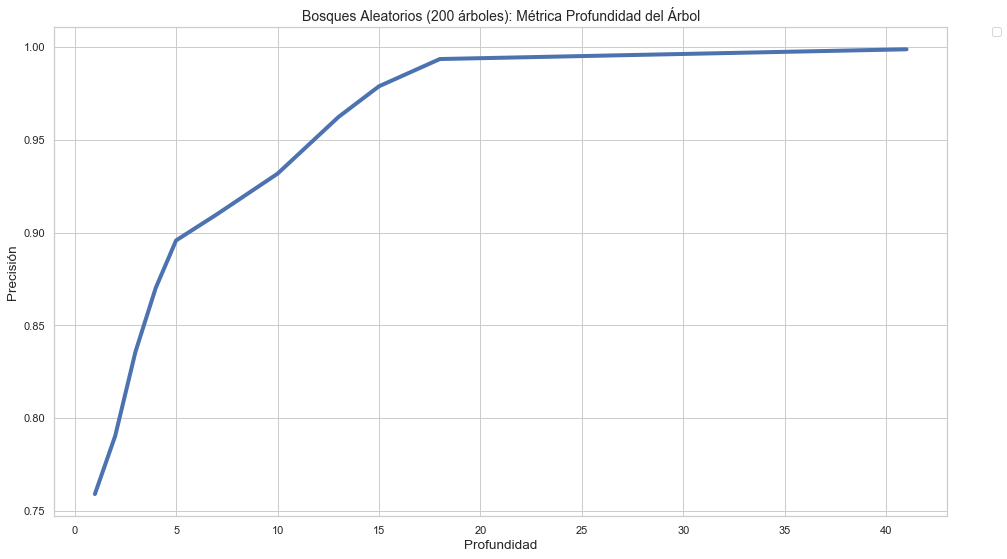

In [7]:
plt.figure(figsize=(16,9))
sns_plot = sns.lineplot(x='Profundidad', y="Accuracy", data=random_forest_profundidad_df[random_forest_profundidad_df['Type'] == 'TEST'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.title("Bosques Aleatorios (200 árboles): Métrica Profundidad del Árbol", fontsize=14)
plt.xlabel('Profundidad')
plt.ylabel("Precisión")

plt.show()


fig = sns_plot.get_figure()
saveFigure(sns_plot, 'Random_Forest_Max-Depth')

In [8]:
random_forest_ejSplit_df = pd.read_csv('../data/resultados/curvaValidacion/randomForestEJEMPLOS_SPLIT.csv', sep=';')
random_forest_ejSplit_df.head()

,Minimo_Ejemplos,Accuracy,Type
0,0.1,0.888358,TRAIN
1,0.1,0.888248,TEST
2,0.2,0.833462,TRAIN
3,0.2,0.833296,TEST
4,0.3,0.795397,TRAIN


No handles with labels found to put in legend.


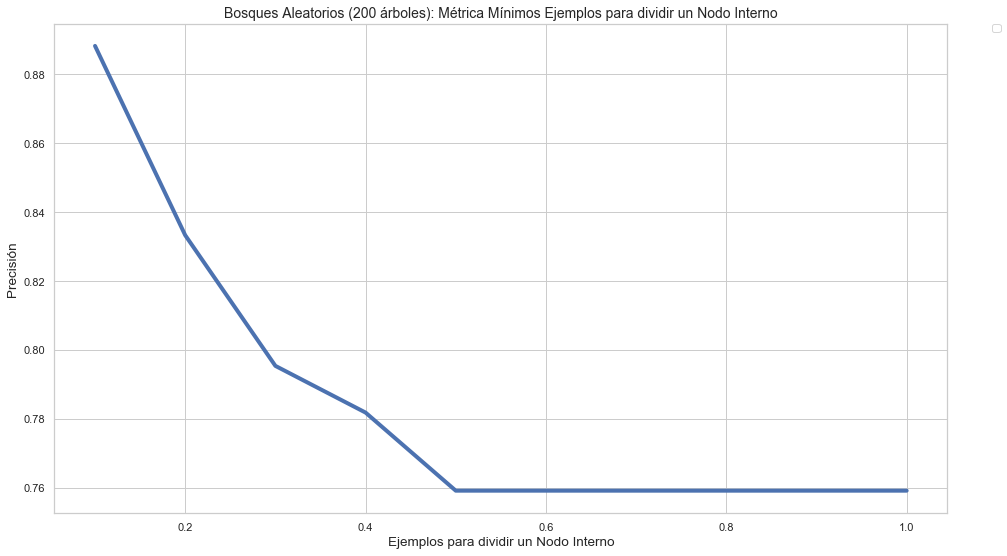

In [9]:
plt.figure(figsize=(16,9))
sns_plot = sns.lineplot(x='Minimo_Ejemplos', y="Accuracy", data=random_forest_ejSplit_df[random_forest_ejSplit_df['Type'] == 'TEST'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title("Bosques Aleatorios (200 árboles): Métrica Mínimos Ejemplos para dividir un Nodo Interno", fontsize=14)
plt.xlabel('Ejemplos para dividir un Nodo Interno')
plt.ylabel("Precisión")

plt.show()


fig = sns_plot.get_figure()
saveFigure(sns_plot, 'Random_Forest_Min-Samples-Split')

In [10]:
random_forest_ejHojas_df = pd.read_csv('../data/resultados/curvaValidacion/randomForestEJEMPLOS_HOJAS.csv', sep=';')
random_forest_ejHojas_df.head()

,Samples_Leaft,Accuracy,Type
0,0.1,0.759241,TRAIN
1,0.1,0.759141,TEST
2,0.2,0.759241,TRAIN
3,0.2,0.759141,TEST
4,0.3,0.759241,TRAIN


No handles with labels found to put in legend.


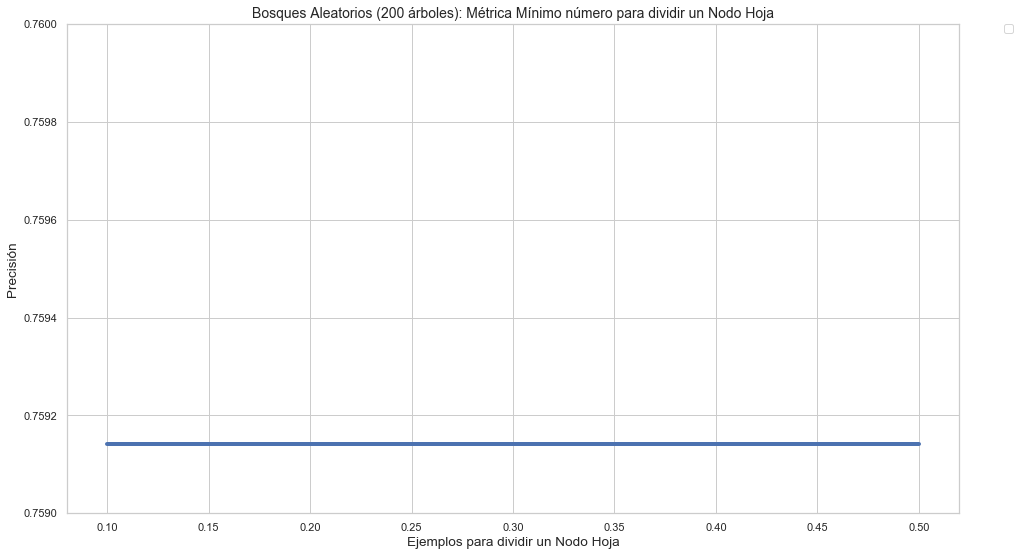

In [11]:
plt.figure(figsize=(16,9))
sns_plot = sns.lineplot(x='Samples_Leaft', y="Accuracy", data=random_forest_ejHojas_df[random_forest_ejHojas_df['Type'] == 'TEST'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("Precisión")
plt.title("Bosques Aleatorios (200 árboles): Métrica Mínimo número para dividir un Nodo Hoja", fontsize=14)
plt.xlabel('Ejemplos para dividir un Nodo Hoja')
plt.ylim([0.759, 0.76])
plt.show()


fig = sns_plot.get_figure()
saveFigure(sns_plot, 'Random_Forest_Min-Samples-Leaft')

## KNN

In [12]:
knn_distance_df = pd.read_csv('../data/resultados/curvaValidacion/knnDistance.csv', sep=';')
knn_distance_df.head()

,Distancia,Accuracy,Type
0,UNIFORME,0.952712,TRAIN
1,UNIFORME,0.930283,TEST
2,DISTANCIA,1.000000,TRAIN
3,DISTANCIA,0.933553,TEST


No handles with labels found to put in legend.


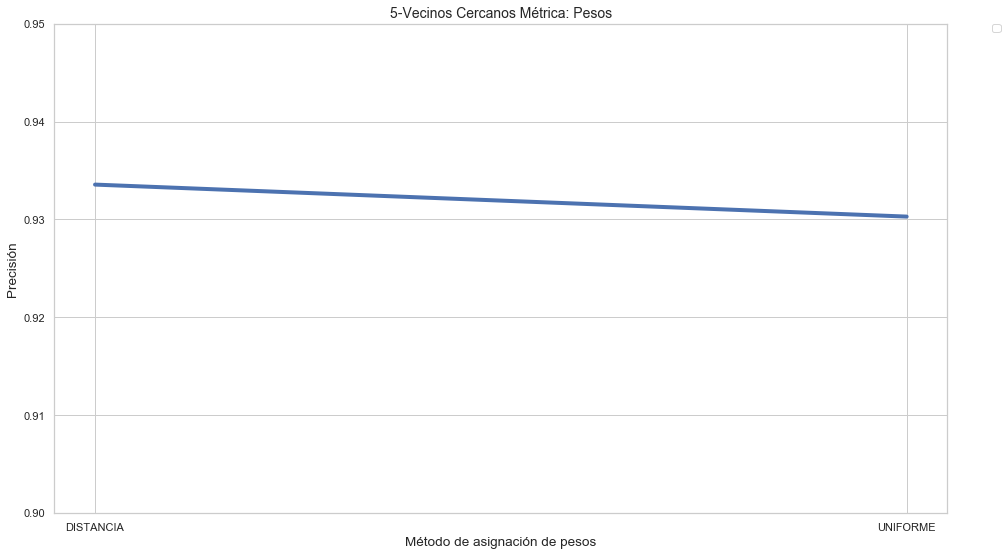

In [13]:
plt.figure(figsize=(16,9))
sns_plot = sns.lineplot(x='Distancia', y="Accuracy",  data=knn_distance_df[knn_distance_df['Type'] == 'TEST'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title("5-Vecinos Cercanos Métrica: Pesos", fontsize=14)
plt.xlabel('Método de asignación de pesos')
plt.ylabel("Precisión")
plt.ylim([0.9, 0.95])
plt.show()

fig = sns_plot.get_figure()
saveFigure(sns_plot, 'knnDISTANCIA')

In [14]:
knn5_distance_df = pd.read_csv('../data/resultados/curvaValidacion/knn5_Distances.csv', sep=';')
knn5_distance_df.head()

,Distance,Accuracy,Type
0,EUCLIDEA,0.952647,TRAIN
1,EUCLIDEA,0.930382,TEST
2,MANHATTAN,0.969200,TRAIN
3,MANHATTAN,0.952822,TEST
4,CHEBYSHEV,0.940422,TRAIN


No handles with labels found to put in legend.


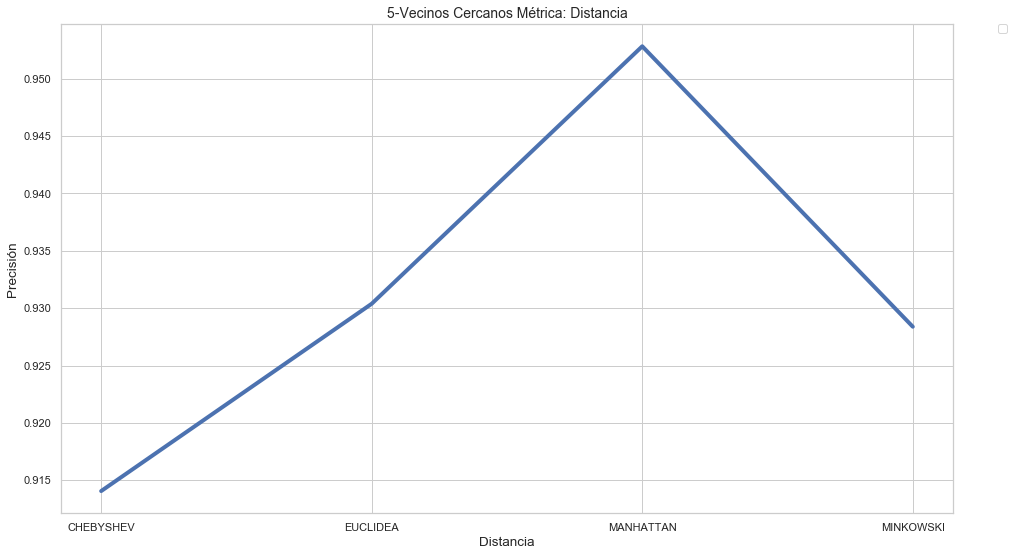

In [15]:
plt.figure(figsize=(16,9))
sns_plot = sns.lineplot(x='Distance', y="Accuracy", data=knn5_distance_df[knn5_distance_df['Type'] == 'TEST'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title("5-Vecinos Cercanos Métrica: Distancia", fontsize=14)
plt.xlabel('Distancia')
plt.ylabel("Precisión")

plt.show()

fig = sns_plot.get_figure()
saveFigure(sns_plot, 'knn5-distance')

In [16]:
rrnn = pd.read_csv('../data/resultados/curvaValidacion/rrNN_DEF.csv', sep=';')
rrnn.head()

,Epocas,Accuracy,Tipo
0,10,0.896642,ENTRENAMIENTO
1,10,0.896761,TEST
2,20,0.919169,ENTRENAMIENTO
3,20,0.918604,TEST
4,50,0.930739,ENTRENAMIENTO


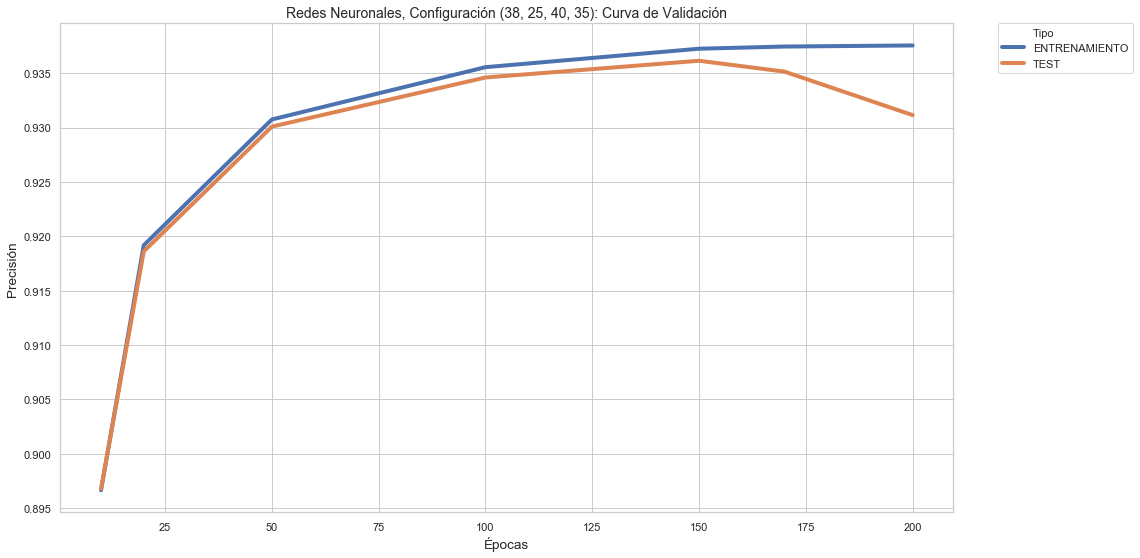

In [17]:
plt.figure(figsize=(16,9))
sns_plot = sns.lineplot(x='Epocas', y="Accuracy", hue='Tipo', data=rrnn)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title("Redes Neuronales, Configuración (38, 25, 40, 35): Curva de Validación", fontsize=14)
plt.xlabel('Épocas')
plt.ylabel("Precisión")

plt.show()

fig = sns_plot.get_figure()
saveFigure(sns_plot, 'rrnn_DEF')